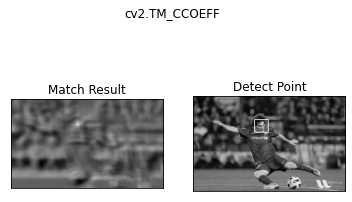

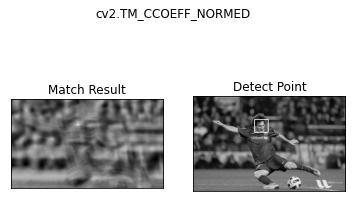

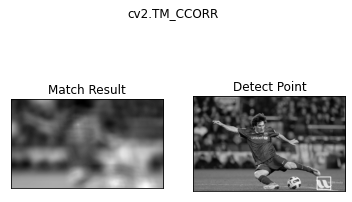

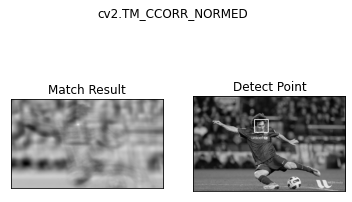

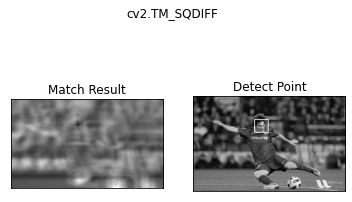

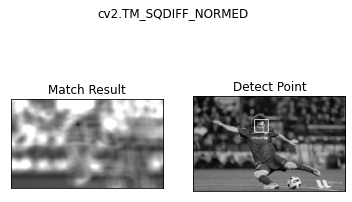

In [11]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

img = cv2.imread("assets/messi5.jpg", 0)
img2 = img.copy()

template = cv2.imread("assets/messi_face.png", 0)
w, h = template.shape

methods = ["cv2.TM_CCOEFF", "cv2.TM_CCOEFF_NORMED", 
        "cv2.TM_CCORR", "cv2.TM_CCORR_NORMED",
        "cv2.TM_SQDIFF", "cv2.TM_SQDIFF_NORMED"]
        
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    res = cv2.matchTemplate(img2, templ=template, method=method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # 如果用的是 cv2.TM_SQDIFF 或 cv2.TM_SQDIFF_NORMED, 则用最小值
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img, top_left, bottom_right, color=255, thickness=2)
    
    # cv2.imshow('Match Res', res)
    # cv2.imshow('Det Res', img)
    # cv2.waitKey(0)
    
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Match Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img, cmap='gray')
    plt.title('Detect Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.savefig(meth+'.png', bbox_inches='tight')
    plt.show()
    
# cv2.destroyAllWindows()

In [ ]:
import cv2 
import numpy 
from matplotlib import pyplot as plt 

img = cv2.imread("assets/coin.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

template = cv2.imread("assets/coin_template.png", 0)
w, h = template.shape

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8

loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0]+w, pt[1]+h), (0, 255, 0), 2)

cv2.imshow("result", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

